# **Identifying Themes from "Men's Rights" Subreddit Feeds**: Dashboard Visualizations


This notebook provides sample code of visualizations to be used for a dashboard that aims to provide an overview and meta-analysis of text data scraped from Men's Rights Activist Subreddit feeds, which include the quarantined `r/TheRedPill` and `r/MGOTW`, as well as `r/MensRights`. We envision this project to be an interactive dashboard of (1) time-series plots for up-votes and number of comments and (2) interactive results from topic models of titles and body text within each feed. 

The text data from Reddit was scraped using the Python Reddit API Wrapper (PRAW), which allowed us to extract 100 posts from the following categories: (1) top (2) hot (3) new (4) controversial (5) rising. Data from each category within each subreddit is stored as their own data frame, which can be selected by the user based on which feed they are interested in viewing. The visualizations in this notebook reflect some of the output code from the options we aim to implement in the final version of this project. 

# Setup code

In [3]:
import pandas as pd
import numpy as np 
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
# Uncomment the line below and rerun if you generate an error 
#!pip install chart-studio
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objects as go

     |████████████████████████████████| 71kB 2.2MB/s 


In [9]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data_path = "/content/drive/My Drive/rsub-redpill-analysis (1)/data" # CHANGE THIS TO REFLECT WHERE THE DATA FOLDER IS IN YOUR DRIVE 

con_df1 = pd.read_csv(os.path.join(data_path,"01_controversial.csv"))
hot_df1 = pd.read_csv(os.path.join(data_path,"01_hot.csv"))
new_df1 = pd.read_csv(os.path.join(data_path,"01_new.csv"))
rising_df1 = pd.read_csv(os.path.join(data_path,"01_rising.csv"))
top_df1 = pd.read_csv(os.path.join(data_path,"01_top.csv"))

con_df2 = pd.read_csv(os.path.join(data_path,"02_controversial.csv"))
hot_df2 = pd.read_csv(os.path.join(data_path,"02_hot.csv"))
new_df2 = pd.read_csv(os.path.join(data_path,"02_new.csv"))
rising_df2 = pd.read_csv(os.path.join(data_path,"02_rising.csv"))
top_df2 = pd.read_csv(os.path.join(data_path,"02_top.csv"))

con_df3 = pd.read_csv(os.path.join(data_path,"03_controversial.csv"))
hot_df3 = pd.read_csv(os.path.join(data_path,"03_hot.csv"))
new_df3 = pd.read_csv(os.path.join(data_path,"03_new.csv"))
rising_df3 = pd.read_csv(os.path.join(data_path,"03_rising.csv"))
top_df3 = pd.read_csv(os.path.join(data_path,"03_top.csv"))

In [0]:
# add year variable
con_df1['year'] = con_df1['date'].astype(str).str[:4]
hot_df1['year'] = hot_df1['date'].astype(str).str[:4]
new_df1['year'] = new_df1['date'].astype(str).str[:4]
rising_df1['year'] = rising_df1['date'].astype(str).str[:4]
top_df1['year'] = top_df1['date'].astype(str).str[:4]

con_df2['year'] = con_df2['date'].astype(str).str[:4]
hot_df2['year'] = hot_df2['date'].astype(str).str[:4]
new_df2['year'] = new_df2['date'].astype(str).str[:4]
rising_df2['year'] = rising_df2['date'].astype(str).str[:4]
top_df2['year'] = top_df2['date'].astype(str).str[:4]

con_df3['year'] = con_df3['date'].astype(str).str[:4]
hot_df3['year'] = hot_df3['date'].astype(str).str[:4]
new_df3['year'] = new_df3['date'].astype(str).str[:4]
rising_df3['year'] = rising_df3['date'].astype(str).str[:4]
top_df3['year'] = top_df3['date'].astype(str).str[:4]

In [0]:
# change variable type for dates and reorder 
top_df1['date'] = pd.to_datetime(top_df1['date'])
top_df1 = top_df1.sort_values(by='date')

top_df2['date'] = pd.to_datetime(top_df2['date'])
top_df2 = top_df2.sort_values(by='date')

top_df3['date'] = pd.to_datetime(top_df3['date'])
top_df3 = top_df3.sort_values(by='date')

con_df1['date'] = pd.to_datetime(con_df1['date'])
con_df1 = con_df1.sort_values(by='date')

con_df2['date'] = pd.to_datetime(con_df2['date'])
con_df2 = con_df2.sort_values(by='date')

con_df3['date'] = pd.to_datetime(con_df3['date'])
con_df3 = con_df3.sort_values(by='date')

In [0]:
# set indices for plotting ts graphs 
top_df1 = top_df1.set_index(['date']) 
top_df2 = top_df2.set_index(['date']) 
top_df3 = top_df3.set_index(['date'])

con_df1 = con_df1.set_index(['date']) 
con_df2 = con_df2.set_index(['date']) 
con_df3 = con_df3.set_index(['date'])

In [0]:
# Initialization step for authenticating plotly account with chart-studio 
# To get API key, go to: https://plot.ly/settings/api
chart_studio.tools.set_credentials_file(username='TURING423',                                              
                                  api_key='UDKlJ1rdGPezI73E85pe')

# Visualization

## Scores and Number of Comments over Time

We can learn a lot from looking at the scores (difference betwen upvotes and downvotes) and number of post comments per month. These interactive charts that are a crucial part of exploratory data analysis then lead us to identify spikes in activity and observe activity around certain key dates related to the Incel movement. 

To guide possible questions, we plan on offering options to plot multiple lines in one graph (one per Subreddit/category) and include the option of highlighting key events relevant to Incel activity. 

In [30]:
# Write series code 
score_series = top_df1.loc[:,('comms_num')]
# score_series.plot(figsize=(10,8));

# Set x and y 
score_series = go.Scatter(x=score_series.index,
                         y=score_series.values)

# Set layout 
layout = go.Layout(title='`r/TheRedPill`: Number of comments among top 100 posts', xaxis=dict(title='Date'),
                   yaxis=dict(title='# Comments'))

# Plot
fig = go.Figure(data=[score_series], layout=layout)
py.iplot(fig, sharing='public')

In [31]:
# Write series code 
score_series = top_df1.loc[:,('score')]
# score_series.plot(figsize=(10,8));

# Set x and y 
score_series  = go.Scatter(x=score_series.index,
                         y=score_series.values)

# Set layout 
layout = go.Layout(title='`r/TheRedPill`: Score Among top 100 posts', xaxis=dict(title='Date'),
                   yaxis=dict(title='Score'))

# Plot
fig = go.Figure(data=[score_series], layout=layout)
py.iplot(fig, sharing='public')

In [32]:
# Write series code 
score_series = con_df1.loc[:,('comms_num')]
# score_series.plot(figsize=(10,8));

# Set x and y 
score_series = go.Scatter(x=score_series.index,
                         y=score_series.values)

# Set layout 
layout = go.Layout(title='`r/TheRedPill`: Number of Comments among 100 most controversial posts', xaxis=dict(title='Date'),
                   yaxis=dict(title='# Comments'))

# Plot
fig = go.Figure(data=[score_series], layout=layout)
py.iplot(fig, sharing='public')

In [0]:

# Write series code 
score_series = con_df1.loc[:,('score')]
#score_series.plot(figsize=(10,8));

# Set x and y 
score_series  = go.Scatter(x=score_series.index,
                         y=score_series.values)

# Set layout 
layout = go.Layout(title='`r/TheRedPill`: Score among 100 most controversial posts', xaxis=dict(title='Date'),
                   yaxis=dict(title='Score'))

# Plot
fig = go.Figure(data=[score_series], layout=layout)
py.iplot(fig, sharing='public')

In [33]:

# Write series code 
score_series = top_df2.loc[:,("comms_num")]
#score_series.plot(figsize=(10,8));

# Set x and y 
score_series  = go.Scatter(x=score_series.index,
                         y=score_series.values)

# Set layout 
layout = go.Layout(title='`r/MGTOW`: Number of comments among top 100 posts', xaxis=dict(title='Date'),
                   yaxis=dict(title='# Comments'))

# Plot
fig = go.Figure(data=[score_series], layout=layout)
py.iplot(fig, sharing='public')

In [34]:

# Write series code 
score_series = top_df2.loc[:,("ups")]
#score_series.plot(figsize=(10,8));

# Set x and y 
score_series  = go.Scatter(x=score_series.index,
                         y=score_series.values)

# Set layout 
layout = go.Layout(title='`r/MGTOW`: Number of upvotes among top 100 posts', xaxis=dict(title='Date'),
                   yaxis=dict(title='(no. upvotes)'))

# Plot
fig = go.Figure(data=[score_series], layout=layout)
py.iplot(fig, sharing='public')

In [35]:

# Write series code 
score_series = con_df2.loc[:,("comms_num")]
#score_series.plot(figsize=(10,8));

# Set x and y 
score_series  = go.Scatter(x=score_series.index,
                         y=score_series.values)

# Set layout 
layout = go.Layout(title='`r/MGTOW`: Number of comments among most controversial 100 posts', xaxis=dict(title='Date'),
                   yaxis=dict(title='(no. Comments )'))

# Plot
fig = go.Figure(data=[score_series], layout=layout)
py.iplot(fig, sharing='public')

In [36]:

# Write series code 
score_series = con_df2.loc[:,("score")]
#score_series.plot(figsize=(10,8));

# Set x and y 
score_series  = go.Scatter(x=score_series.index,
                         y=score_series.values)

# Set layout 
layout = go.Layout(title='`r/MGTOW`: Score among most controversial 100 posts', xaxis=dict(title='Date'),
                   yaxis=dict(title='(score)'))

# Plot
fig = go.Figure(data=[score_series], layout=layout)
py.iplot(fig, sharing='public')

In [39]:
# Write series code 
score_series = top_df3.loc[:,("comms_num")]
#score_series.plot(figsize=(10,8));

# Set x and y 
score_series  = go.Scatter(x=score_series.index,
                         y=score_series.values)

# Set layout 
layout = go.Layout(title='r/MensRights`: Number of Comments among top 100 posts', xaxis=dict(title='Date'),
                   yaxis=dict(title='(no. Comments )'))

# Plot
fig = go.Figure(data=[score_series], layout=layout)
py.iplot(fig, sharing='public')

PlotlyRequestError: ignored

In [0]:
# Write series code 
score_series = top_df3.loc[:,("score")]
#score_series.plot(figsize=(10,8));

# Set x and y 
score_series  = go.Scatter(x=score_series.index,
                         y=score_series.values)

# Set layout 
layout = go.Layout(title='`r/MensRights`: Score among top 100 posts', xaxis=dict(title='Date'),
                   yaxis=dict(title='(score)'))

# Plot
fig = go.Figure(data=[score_series], layout=layout)
py.iplot(fig, sharing='public')

In [0]:
# Write series code 
score_series = con_df3.loc[:,("comms_num")]
#score_series.plot(figsize=(10,8));

# Set x and y 
score_series  = go.Scatter(x=score_series.index,
                         y=score_series.values)

# Set layout 
layout = go.Layout(title='`r/MensRights`: Number of comments among 100 most controversial posts', xaxis=dict(title='Date'),
                   yaxis=dict(title='(no. Comments )'))

# Plot
fig = go.Figure(data=[score_series], layout=layout)
py.iplot(fig, sharing='public')

In [0]:
# Write series code 
score_series = con_df3.loc[:,("score")]
#score_series.plot(figsize=(10,8));

# Set x and y 
score_series  = go.Scatter(x=score_series.index,
                         y=score_series.values)

# Set layout 
layout = go.Layout(title='`r/MensRights`: Score among 100 most controversial posts', xaxis=dict(title='Date'),
                   yaxis=dict(title='(score )'))

# Plot
fig = go.Figure(data=[score_series], layout=layout)
py.iplot(fig, sharing='public')

# Basic Topic Models

At this stage of the project, interactive visualizations of basic topic models remains a work in progress. As offering unstructured text in its original form would violate best practices with regards to ethics, topic models offer insight on trends within the text data from the title and body of extracted posts.

In [0]:
# load regex library 
import re 

# remove punct 
con_df1['title_processed'] = con_df1['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# convert titles to lowercase 
con_df1['title_processed'] = con_df1['title_processed'].map(lambda x: x.lower())

# print out first rows 
con_df1['title_processed'].head()

date
2013-03-23 13:52:58    feminism how the rockefellers re-engineered women
2013-04-02 08:03:49    not a matter of if not a matter of when i'm ch...
2013-04-18 17:52:54    the pill is dissolving inside me eye opening f...
2013-04-19 01:15:28    anybody want to place a bet on how this turns out
2013-04-20 00:25:07    google search auto-fill proof of the solipsism...
Name: title_processed, dtype: object

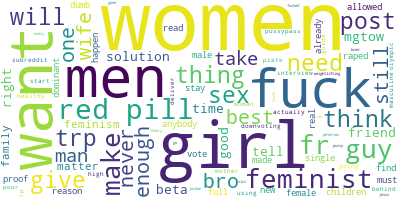

In [0]:
# exploratory analysis 
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(con_df1['title_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

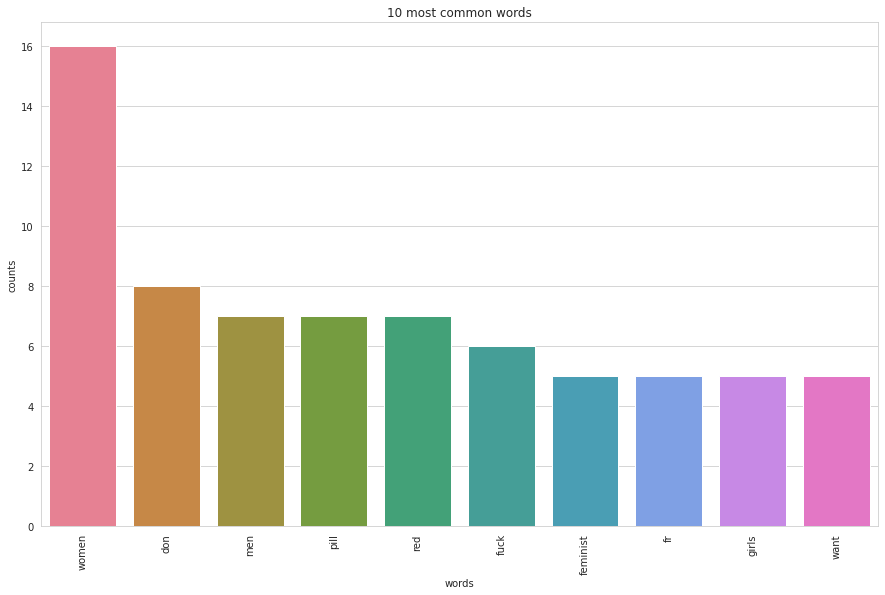

In [0]:
# prepare text for lda 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(con_df1['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [0]:
# Train LDA model 

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
men friend don feminist women like best theory slut thing

Topic #1:
pill red women trp read single good new game mgtow

Topic #2:
women girls want fr think guys men don beta man

Topic #3:
fuck don pussypass post female jesus girl gone make feminist

Topic #4:
saw right girl interview rp 20 things using wants family


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
imUsingColab = False

if imUsingColab:
    !pip install gensim
    !pip install pyLDAvis
    !pip install vega
    !pip install altair

In [0]:
!pip install pyLDAvis
from gensim import corpora
from gensim.models.ldamodel import LdaModel

import pyLDAvis.gensim

     |████████████████████████████████| 1.6MB 3.1MB/s 
     |████████████████████████████████| 552kB 41.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=adaf3305f8f35e20039e1b732ae087bb97ea1df9be0c792a1e2cf23ffec928da
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=c24b2a5bac5dc192b2c3668752bcac763cac1d0a9d4a6c3a7b0ddf16d9418600
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
# attempt to load altair 
#!pip install vega
try:
    import altair as alt
    if imUsingColab:
        alt.renderers.enable('colab')
    else:
        alt.renderers.enable('notebook')    
    imUsingAltair = True
    print('Altair successfully loaded.')

except ModuleNotFoundError:
    imUsingAltair = False
    print('Altair loading failed. Will default to matplotlib.')
    

ValueError: ignored

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
pd.options.mode.chained_assignment = None 

random_state = 20181126

In [0]:
cluster_vars = ['score','comms_num','year']
con_df1 = con_df1.dropna(subset=cluster_vars+['title'])

In [0]:
samp_df = con_df1
titles = {samp_df.title.loc[i] : i for i in samp_df.index.values}

In [0]:
scaler = StandardScaler()
scaler.fit(samp_df[cluster_vars].astype(float))
X = pd.DataFrame(scaler.transform(samp_df[cluster_vars].astype(float)), columns=cluster_vars)

In [0]:
kmeans = KMeans(n_clusters=5, 
                random_state=random_state)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
samp_df['cluster'] = (y_kmeans+1).astype(str)


In [0]:
vectorizer = CountVectorizer(max_df=.5, 
                             min_df=8,
                             max_features=1000,
                             stop_words='english'
                            )

X_text = pd.DataFrame((vectorizer.fit_transform(con_df1.title_processed)>0).toarray())
all_words = vectorizer.get_feature_names()
d = {i : all_words[i] for i in range(len(all_words))}

tokens = [[d[j] for j in X_text.columns[X_text.loc[i]].tolist()] for i in range(X_text.shape[0])]

print(np.random.choice(tokens, 2))

[list([]) list([])]


In [0]:
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(text) for text in tokens]

In [0]:
ldamodel = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=30, random_state=random_state)
topics = ldamodel.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.976*"don" + 0.024*"women"')
(1, '0.977*"women" + 0.023*"don"')
(2, '0.505*"women" + 0.495*"don"')
(3, '0.972*"women" + 0.028*"don"')
(4, '0.504*"women" + 0.496*"don"')


In [0]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)